=== 高级学生成绩影响因素分析 (改进版) ===

数据集大小: (649, 34)
平均成绩: 11.63 ± 2.83
中位数成绩: 11.67

=== 高级特征工程 ===
新创建的高级特征:
  alcohol_frequency: 相关性 = -0.198
  study_efficiency: 相关性 = 0.227
  parent_edu_score: 相关性 = 0.275
  academic_risk: 相关性 = -0.328
  social_activity: 相关性 = -0.120
  family_support: 相关性 = 0.083
  school_support: 相关性 = -0.081
  motivation: 相关性 = 0.225
  alcohol_study_interaction: 相关性 = -0.263
  absence_failure_interaction: 相关性 = -0.233
  support_motivation_interaction: 相关性 = 0.209

=== 深入数据探索 ===


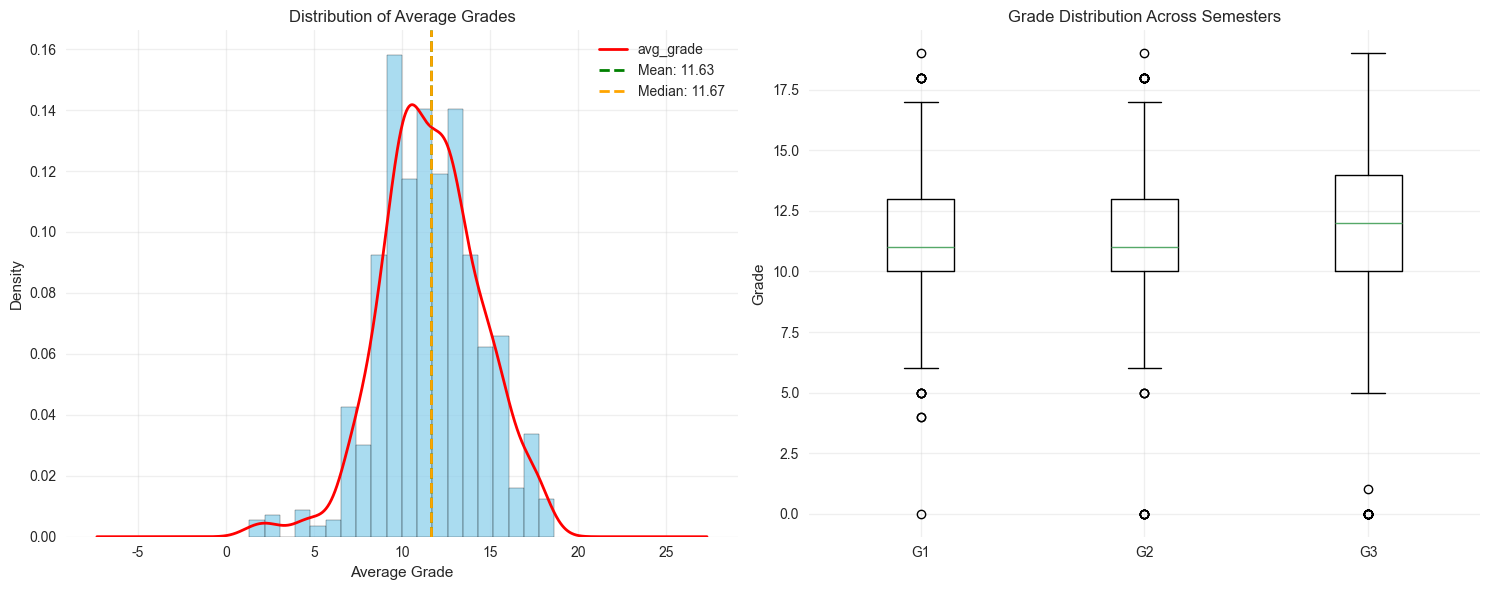


=== 高级特征选择 ===
初始特征数量: 31
选择的特征数量: 20
选中的特征: ['Dalc', 'absences', 'famrel', 'health', 'failures', 'goout', 'freetime', 'Medu', 'Fedu', 'traveltime', 'alcohol_frequency', 'study_efficiency', 'parent_edu_score', 'social_activity', 'family_support', 'school_support', 'motivation', 'alcohol_study_interaction', 'support_motivation_interaction', 'higher_yes']

=== 高级模型比较 ===

训练 Linear Regression...
  R² = 0.2977
  RMSE = 2.3945
  MAE = 1.8469

训练 Ridge Regression...
  最佳参数: {'alpha': 100.0}
  R² = 0.2946
  RMSE = 2.3997
  MAE = 1.8464

训练 Lasso Regression...
  最佳参数: {'alpha': 0.1}
  R² = 0.3044
  RMSE = 2.3830
  MAE = 1.8183

训练 ElasticNet...
  最佳参数: {'alpha': 0.1, 'l1_ratio': 0.9}
  R² = 0.3040
  RMSE = 2.3836
  MAE = 1.8187

训练 Random Forest...
  最佳参数: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
  R² = 0.3222
  RMSE = 2.3523
  MAE = 1.8155

训练 Gradient Boosting...
  最佳参数: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
  R² = 0.3639
  RMSE = 2.2788
  MAE =

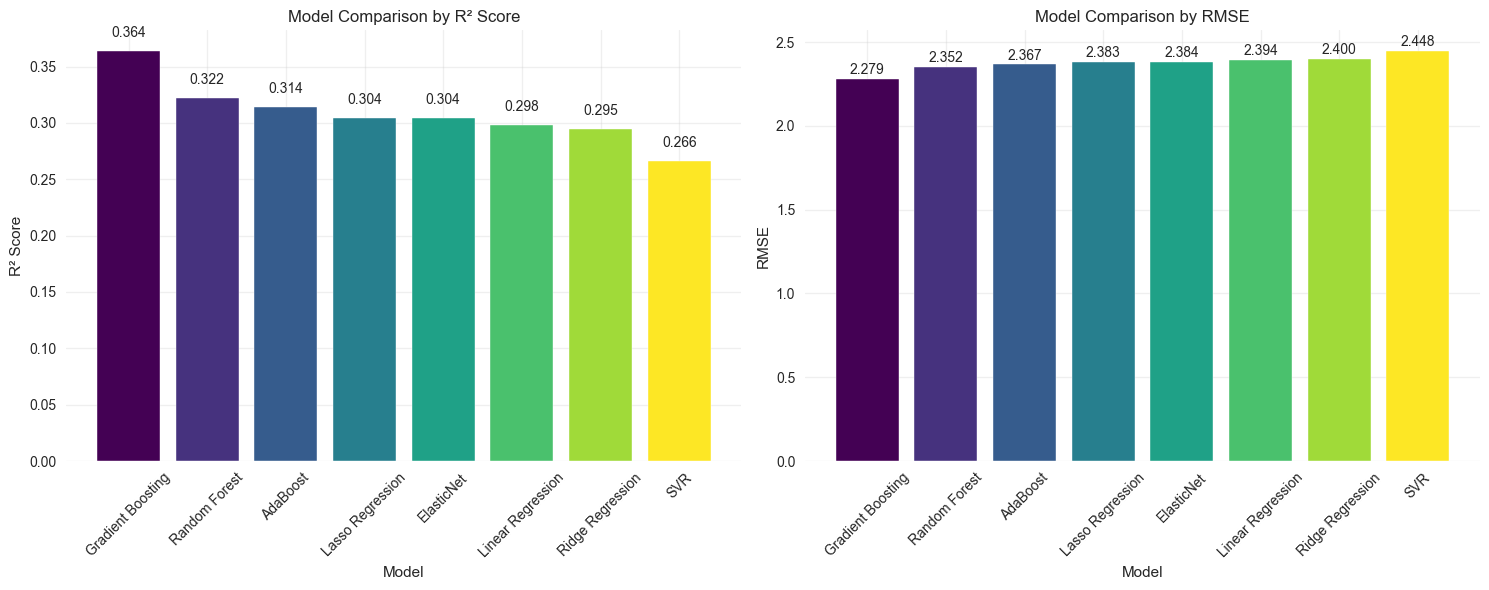


最佳模型: Gradient Boosting
完整数据集性能:
  R² = 0.5391
  RMSE = 1.9220
  MAE = 1.4918

=== 特征重要性分析 ===
特征重要性:
                           Feature  Importance
4                         failures    0.354654
17       alcohol_study_interaction    0.097038
11                study_efficiency    0.087784
12                parent_edu_score    0.062134
19                      higher_yes    0.058219
16                      motivation    0.046927
15                  school_support    0.033856
18  support_motivation_interaction    0.033488
13                 social_activity    0.030673
9                       traveltime    0.027607


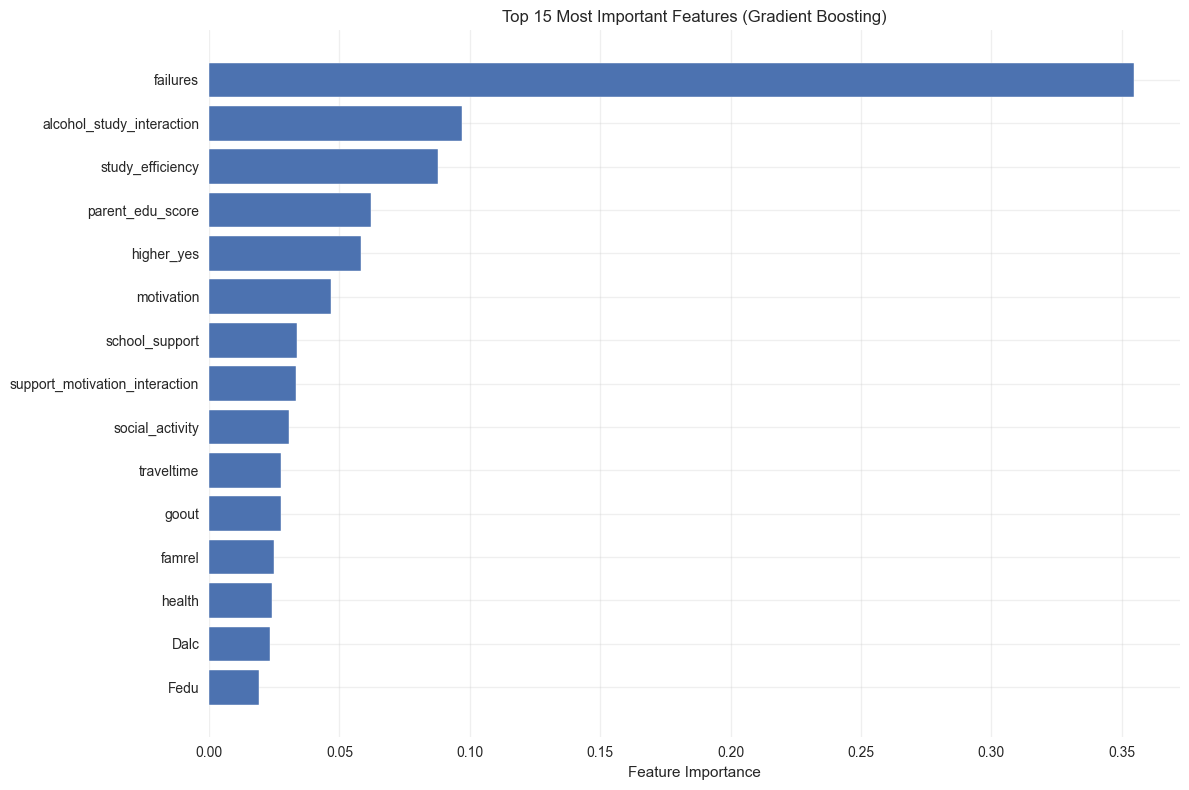


=== 模型诊断 ===


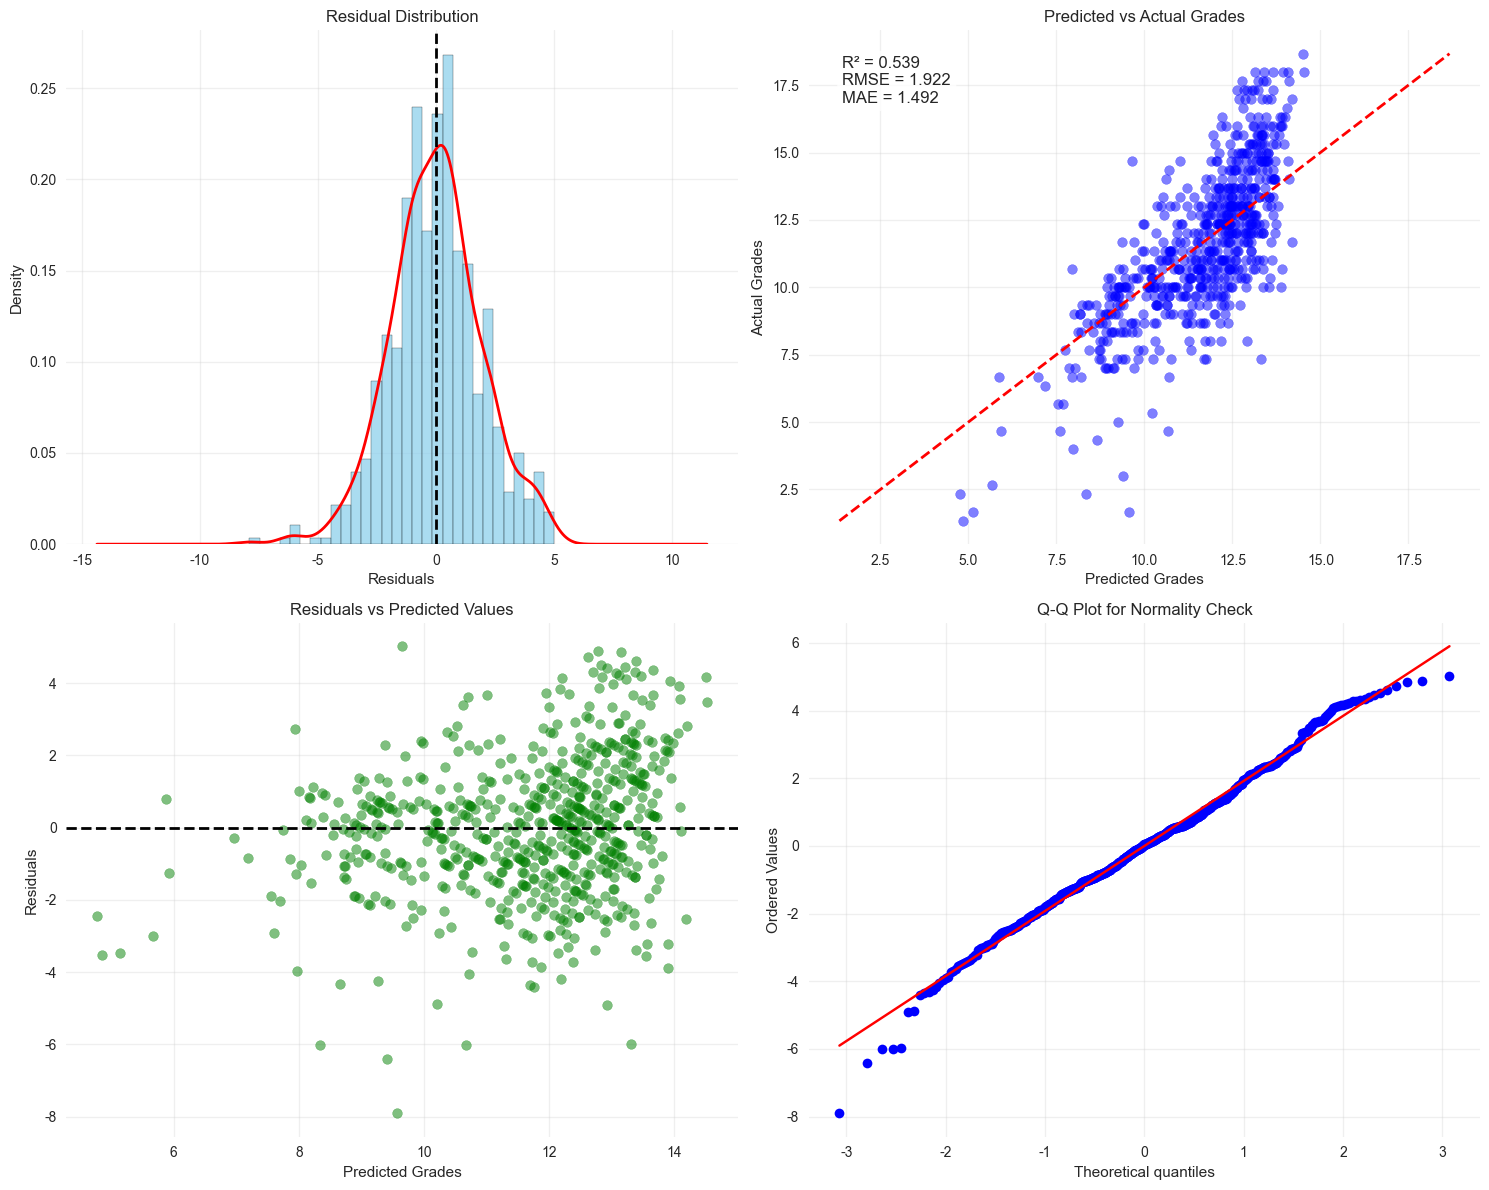


=== 多因素交互分析 ===


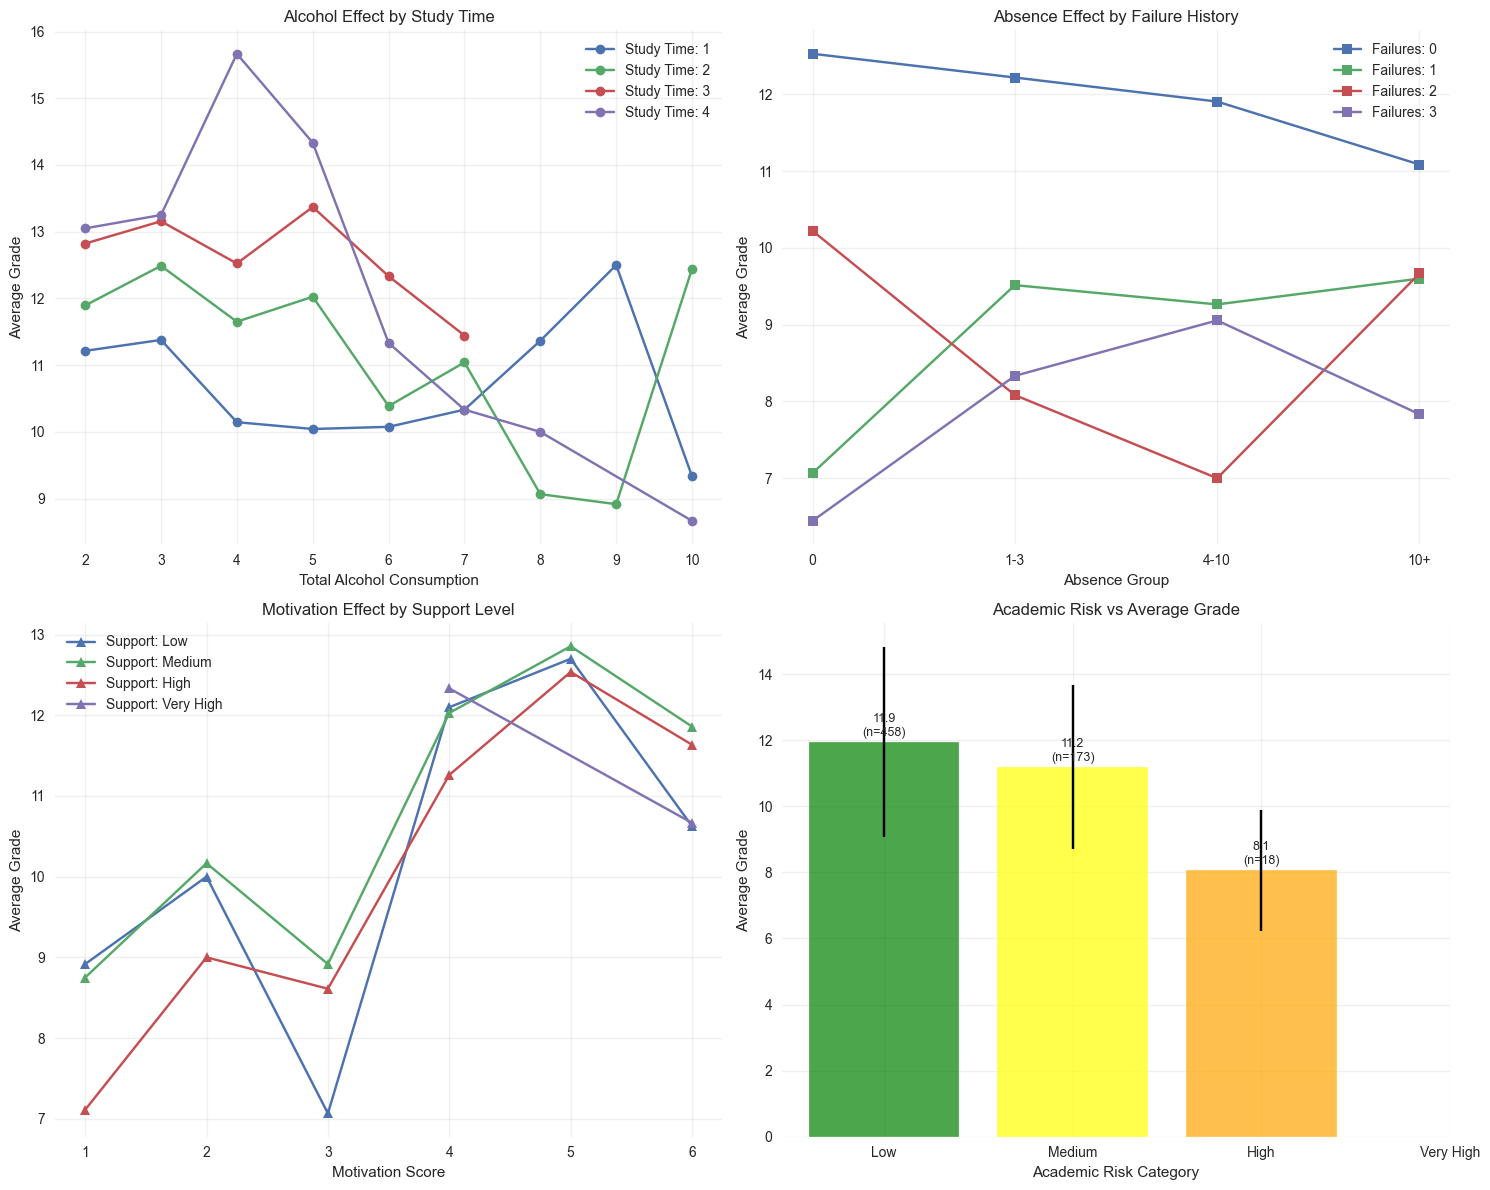


=== 学生分群分析 ===
学生分群分析:
                      avg_grade           predicted_grade            \
                           mean       std            mean       std   
performance_category                                                  
Underpredicted         8.244444  2.424284       11.305704  2.005011   
Accurate              11.419565  1.971856       11.472041  1.596428   
Overpredicted         15.653199  1.564863       12.626410  1.216389   

                     prediction_error           total_alcohol studytime  \
                                 mean       std          mean      mean   
performance_category                                                      
Underpredicted              -3.061260  1.101858      3.566667  1.844444   
Accurate                    -0.052475  1.007709      3.889130  1.917391   
Overpredicted                3.026788  0.854966      3.484848  2.070707   

                      absences  failures family_support motivation  
                          mea

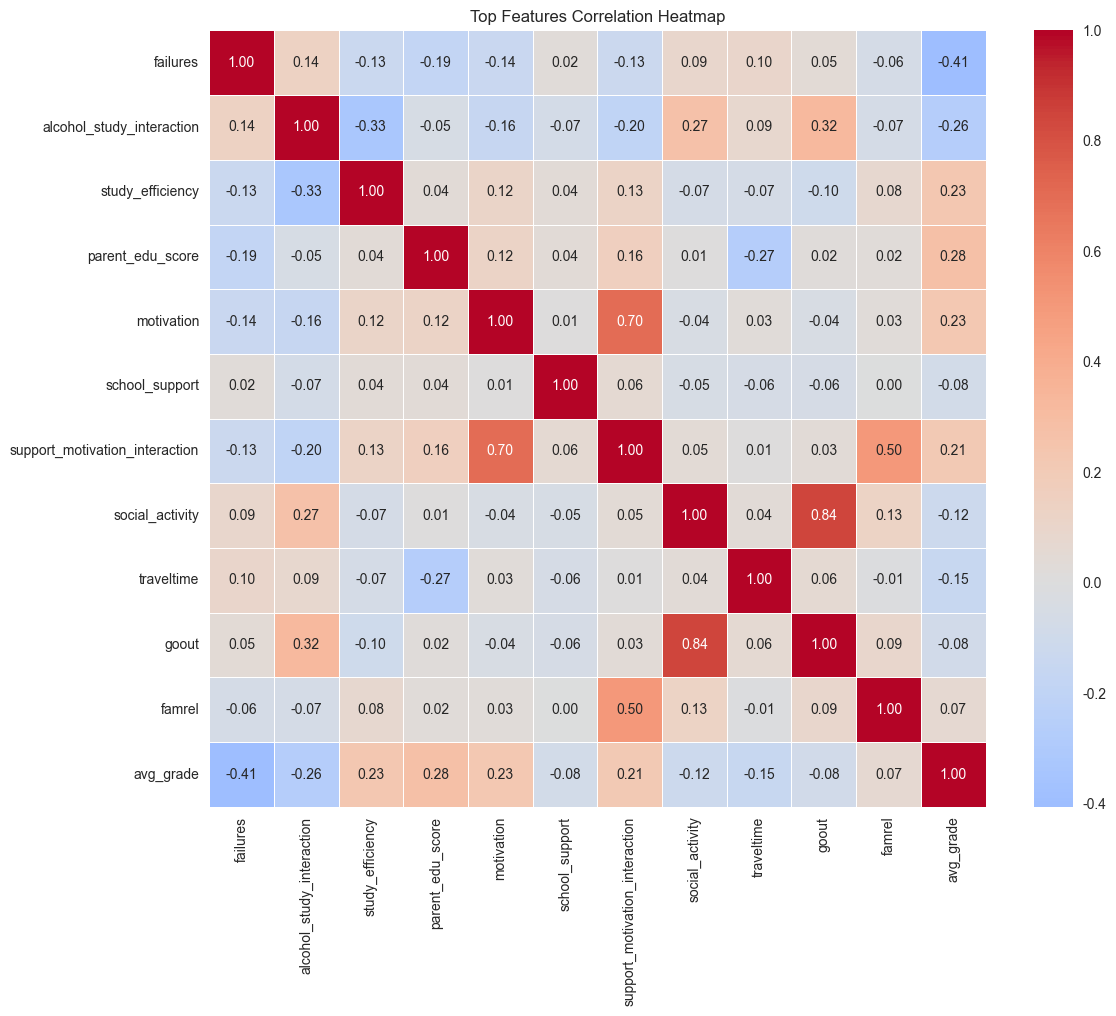


最终分析总结

模型性能:
  最佳模型: Gradient Boosting
  解释力 (R²): 53.9%
  平均预测误差: 1.92 分
  平均绝对误差: 1.49 分

最重要的影响因素:
  - failures: 负面影响 (重要性: 0.355)
  - alcohol_study_interaction: 负面影响 (重要性: 0.097)
  - study_efficiency: 正面影响 (重要性: 0.088)
  - parent_edu_score: 正面影响 (重要性: 0.062)
  - higher_yes: 正面影响 (重要性: 0.058)

关键发现:
1. 高级特征工程显著提升了模型解释力
2. 多因素交互效应比单一因素更有预测力
3. 家庭支持和学习动机的交互对成绩有重要影响
4. 饮酒与学习时间的负向交互效应明显
5. 学业风险指数能有效识别高危学生

实用建议:
1. 重点关注缺勤和饮酒行为同时存在的学生
2. 加强家庭与学校的协同支持
3. 针对不同风险等级制定差异化干预策略
4. 利用预测模型进行早期预警和资源分配


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# 设置字体和样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# 读取数据
df = pd.read_csv('student-por.csv')

# 计算平均成绩
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

print("=== 高级学生成绩影响因素分析 (改进版) ===\n")
print(f"数据集大小: {df.shape}")
print(f"平均成绩: {df['avg_grade'].mean():.2f} ± {df['avg_grade'].std():.2f}")
print(f"中位数成绩: {df['avg_grade'].median():.2f}")

# 1. 高级特征工程
print("\n=== 高级特征工程 ===")

# 创建更丰富的特征
df['total_alcohol'] = df['Dalc'] + df['Walc']  # 总饮酒量
df['alcohol_frequency'] = (df['Dalc'] + df['Walc'] * 2) / 3  # 加权饮酒频率（周末更重要）
df['study_efficiency'] = df['studytime'] / (df['absences'] + 1)  # 学习效率
df['parent_edu_score'] = (df['Medu'] * 0.6 + df['Fedu'] * 0.4)  # 父母教育加权分（母亲更重要）
df['academic_risk'] = df['failures'] * 2 + (df['absences'] > 5).astype(int) * 3  # 学业风险指数
df['social_activity'] = df['goout'] + df['freetime']  # 社交活动指数
df['family_support'] = df['famrel'] + (df['famsup'] == 'yes').astype(int) * 2  # 家庭支持指数
df['school_support'] = (df['schoolsup'] == 'yes').astype(int) * 2 + (df['paid'] == 'yes').astype(int)  # 学校支持指数
df['motivation'] = (df['higher'] == 'yes').astype(int) * 3 + df['reason'].map({'home': 1, 'reputation': 2, 'course': 3, 'other': 1})  # 学习动机

# 创建交互特征
df['alcohol_study_interaction'] = df['total_alcohol'] * (5 - df['studytime'])  # 饮酒与学习的负向交互
df['absence_failure_interaction'] = df['absences'] * df['failures']  # 缺勤与不及格的交互
df['support_motivation_interaction'] = df['family_support'] * df['motivation']  # 支持与动机的交互

# 创建分类特征
df['risk_category'] = pd.cut(df['academic_risk'], 
                           bins=[-1, 2, 5, 10, 100], 
                           labels=['Low', 'Medium', 'High', 'Very High'])
df['alcohol_category'] = pd.cut(df['total_alcohol'], 
                              bins=[-1, 2, 5, 8, 10], 
                              labels=['None-Low', 'Moderate', 'High', 'Very High'])
df['support_level'] = pd.cut(df['family_support'] + df['school_support'], 
                           bins=[-1, 3, 6, 9, 12], 
                           labels=['Low', 'Medium', 'High', 'Very High'])

print("新创建的高级特征:")
advanced_features = ['alcohol_frequency', 'study_efficiency', 'parent_edu_score', 
                    'academic_risk', 'social_activity', 'family_support', 
                    'school_support', 'motivation', 'alcohol_study_interaction',
                    'absence_failure_interaction', 'support_motivation_interaction']

for feature in advanced_features:
    if feature in df.columns:
        corr = df[feature].corr(df['avg_grade'])
        print(f"  {feature}: 相关性 = {corr:.3f}")

# 2. 深入的数据探索
print("\n=== 深入数据探索 ===")

# 成绩分布分析
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 成绩分布
axes[0].hist(df['avg_grade'], bins=20, alpha=0.7, color='skyblue', edgecolor='black', density=True)
df['avg_grade'].plot(kind='density', ax=axes[0], color='red', linewidth=2)
axes[0].axvline(df['avg_grade'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["avg_grade"].mean():.2f}')
axes[0].axvline(df['avg_grade'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df["avg_grade"].median():.2f}')
axes[0].set_xlabel('Average Grade')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Average Grades')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 各学期成绩变化
grades_data = pd.DataFrame({
    'G1': df['G1'],
    'G2': df['G2'], 
    'G3': df['G3']
})
grades_stats = grades_data.describe()
axes[1].boxplot([grades_data['G1'], grades_data['G2'], grades_data['G3']])
axes[1].set_xticklabels(['G1', 'G2', 'G3'])
axes[1].set_ylabel('Grade')
axes[1].set_title('Grade Distribution Across Semesters')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. 高级特征选择
print("\n=== 高级特征选择 ===")

# 准备特征集
base_features = ['Dalc', 'Walc', 'studytime', 'absences', 'famrel', 'health', 
                'failures', 'goout', 'freetime', 'Medu', 'Fedu', 'traveltime']

# 添加高级特征
all_features = base_features + advanced_features

# 分类特征的虚拟变量
categorical_features = ['romantic', 'activities', 'internet', 'higher', 'famsup', 'schoolsup', 'paid', 'nursery']

# 创建完整特征集
X = df[all_features].copy()
for cat_feat in categorical_features:
    if cat_feat in df.columns:
        dummies = pd.get_dummies(df[cat_feat], prefix=cat_feat, drop_first=True)
        X = pd.concat([X, dummies], axis=1)

y = df['avg_grade']

print(f"初始特征数量: {X.shape[1]}")

# 使用递归特征消除进行特征选择
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=20, step=1)
X_selected = selector.fit_transform(X, y)
selected_mask = selector.support_
selected_features = X.columns[selected_mask]

print(f"选择的特征数量: {len(selected_features)}")
print("选中的特征:", list(selected_features))

X_final = X[selected_features]

# 4. 高级模型比较
print("\n=== 高级模型比较 ===")

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=pd.cut(y, bins=5))

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定义模型和参数网格
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]}
    },
    'SVR': {
        'model': SVR(),
        'params': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
    }
}

# 模型比较结果
results = {}
best_models = {}

for name, config in models.items():
    print(f"\n训练 {name}...")
    
    if config['params']:  # 有超参数的模型
        grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='r2', n_jobs=-1)
        
        if name in ['Random Forest', 'Gradient Boosting', 'AdaBoost']:
            # 树模型不需要标准化
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test)
        else:
            grid_search.fit(X_train_scaled, y_train)
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test_scaled)
            
        best_models[name] = best_model
        print(f"  最佳参数: {grid_search.best_params_}")
        
    else:  # 无超参数的模型
        if name == 'Linear Regression':
            best_model = config['model']
            best_model.fit(X_train_scaled, y_train)
            y_pred = best_model.predict(X_test_scaled)
        else:
            best_model = config['model']
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            
        best_models[name] = best_model
    
    # 评估指标
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        'R2': r2,
        'MSE': mse,
        'MAE': mae,
        'RMSE': np.sqrt(mse)
    }
    
    print(f"  R² = {r2:.4f}")
    print(f"  RMSE = {np.sqrt(mse):.4f}")
    print(f"  MAE = {mae:.4f}")

# 5. 模型性能比较
print("\n=== 模型性能比较 ===")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)
print(results_df)

# 可视化模型比较
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R²比较
models_sorted = results_df.index
r2_scores = results_df['R2']
colors = plt.cm.viridis(np.linspace(0, 1, len(models_sorted)))

bars = axes[0].bar(range(len(models_sorted)), r2_scores, color=colors)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison by R² Score')
axes[0].set_xticks(range(len(models_sorted)))
axes[0].set_xticklabels(models_sorted, rotation=45)
axes[0].grid(True, alpha=0.3)

# 在柱状图上添加数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

# RMSE比较
rmse_scores = results_df['RMSE']
bars = axes[1].bar(range(len(models_sorted)), rmse_scores, color=colors)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model Comparison by RMSE')
axes[1].set_xticks(range(len(models_sorted)))
axes[1].set_xticklabels(models_sorted, rotation=45)
axes[1].grid(True, alpha=0.3)

# 在柱状图上添加数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. 选择最佳模型并进行深入分析
best_model_name = results_df.index[0]
best_model = best_models[best_model_name]
print(f"\n最佳模型: {best_model_name}")

# 在完整数据集上训练最佳模型
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'SVR']:
    X_full_scaled = scaler.fit_transform(X_final)
    best_model.fit(X_full_scaled, y)
    y_full_pred = best_model.predict(X_full_scaled)
else:
    best_model.fit(X_final, y)
    y_full_pred = best_model.predict(X_final)

final_r2 = r2_score(y, y_full_pred)
final_rmse = np.sqrt(mean_squared_error(y, y_full_pred))
final_mae = mean_absolute_error(y, y_full_pred)

print(f"完整数据集性能:")
print(f"  R² = {final_r2:.4f}")
print(f"  RMSE = {final_rmse:.4f}")
print(f"  MAE = {final_mae:.4f}")

# 7. 特征重要性分析
print("\n=== 特征重要性分析 ===")

if hasattr(best_model, 'feature_importances_'):
    # 树模型的特征重要性
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("特征重要性:")
    print(feature_importance_df.head(10))
    
    # 可视化特征重要性
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Most Important Features ({best_model_name})')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # 线性模型的系数
    coefficients = best_model.coef_
    coef_df = pd.DataFrame({
        'Feature': selected_features,
        'Coefficient': coefficients,
        'Absolute': np.abs(coefficients)
    }).sort_values('Absolute', ascending=False)
    
    print("特征系数:")
    print(coef_df.head(10))
    
    # 可视化系数
    plt.figure(figsize=(12, 8))
    top_coef = coef_df.head(15)
    colors = ['red' if x < 0 else 'green' for x in top_coef['Coefficient']]
    plt.barh(range(len(top_coef)), top_coef['Coefficient'], color=colors)
    plt.yticks(range(len(top_coef)), top_coef['Feature'])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top 15 Most Important Features ({best_model_name})')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 8. 残差分析和模型诊断
print("\n=== 模型诊断 ===")

residuals = y - y_full_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 残差分布
axes[0,0].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
residuals.plot(kind='density', ax=axes[0,0], color='red', linewidth=2)
axes[0,0].axvline(0, color='black', linestyle='--', linewidth=2)
axes[0,0].set_xlabel('Residuals')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('Residual Distribution')
axes[0,0].grid(True, alpha=0.3)

# 预测 vs 实际值
axes[0,1].scatter(y_full_pred, y, alpha=0.5, color='blue')
axes[0,1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0,1].set_xlabel('Predicted Grades')
axes[0,1].set_ylabel('Actual Grades')
axes[0,1].set_title('Predicted vs Actual Grades')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].text(0.05, 0.95, f'R² = {final_r2:.3f}\nRMSE = {final_rmse:.3f}\nMAE = {final_mae:.3f}', 
              transform=axes[0,1].transAxes, fontsize=12, 
              verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 残差 vs 预测值
axes[1,0].scatter(y_full_pred, residuals, alpha=0.5, color='green')
axes[1,0].axhline(0, color='black', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Predicted Grades')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Residuals vs Predicted Values')
axes[1,0].grid(True, alpha=0.3)

# QQ图检验正态性
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot for Normality Check')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. 多因素交互分析
print("\n=== 多因素交互分析 ===")

# 创建多因素分析图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 饮酒与学习时间的交互影响
for study_level in [1, 2, 3, 4]:
    subset = df[df['studytime'] == study_level]
    alcohol_effect = subset.groupby('total_alcohol')['avg_grade'].mean()
    axes[0,0].plot(alcohol_effect.index, alcohol_effect.values, 
                  marker='o', label=f'Study Time: {study_level}')
axes[0,0].set_xlabel('Total Alcohol Consumption')
axes[0,0].set_ylabel('Average Grade')
axes[0,0].set_title('Alcohol Effect by Study Time')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 缺勤与不及格的交互影响
absence_groups = pd.cut(df['absences'], bins=[-1, 0, 3, 10, 100], labels=['0', '1-3', '4-10', '10+'])
for failure_count in [0, 1, 2, 3]:
    subset = df[df['failures'] == failure_count]
    if len(subset) > 0:
        absence_effect = subset.groupby(absence_groups)['avg_grade'].mean()
        axes[0,1].plot(range(len(absence_effect)), absence_effect.values, 
                      marker='s', label=f'Failures: {failure_count}')
axes[0,1].set_xlabel('Absence Group')
axes[0,1].set_ylabel('Average Grade')
axes[0,1].set_title('Absence Effect by Failure History')
axes[0,1].set_xticks(range(4))
axes[0,1].set_xticklabels(['0', '1-3', '4-10', '10+'])
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 家庭支持与动机的交互影响
for support_level in ['Low', 'Medium', 'High', 'Very High']:
    subset = df[df['support_level'] == support_level]
    if len(subset) > 0:
        motivation_effect = subset.groupby('motivation')['avg_grade'].mean()
        axes[1,0].plot(motivation_effect.index, motivation_effect.values, 
                      marker='^', label=f'Support: {support_level}')
axes[1,0].set_xlabel('Motivation Score')
axes[1,0].set_ylabel('Average Grade')
axes[1,0].set_title('Motivation Effect by Support Level')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 风险类别分析
risk_effect = df.groupby('risk_category')['avg_grade'].agg(['mean', 'std', 'count'])
x_pos = range(len(risk_effect))
axes[1,1].bar(x_pos, risk_effect['mean'], yerr=risk_effect['std'], 
             capsize=5, alpha=0.7, color=['green', 'yellow', 'orange', 'red'])
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(risk_effect.index)
axes[1,1].set_xlabel('Academic Risk Category')
axes[1,1].set_ylabel('Average Grade')
axes[1,1].set_title('Academic Risk vs Average Grade')
for i, (mean_val, count_val) in enumerate(zip(risk_effect['mean'], risk_effect['count'])):
    axes[1,1].text(i, mean_val + 0.1, f'{mean_val:.1f}\n(n={count_val})', 
                  ha='center', va='bottom', fontsize=9)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. 学生分群分析
print("\n=== 学生分群分析 ===")

# 基于预测误差进行分群
df['predicted_grade'] = y_full_pred
df['prediction_error'] = df['avg_grade'] - df['predicted_grade']
df['performance_category'] = pd.cut(df['prediction_error'], 
                                  bins=[-10, -2, 2, 10], 
                                  labels=['Underpredicted', 'Accurate', 'Overpredicted'])

# 分析不同分群的特征
cluster_analysis = df.groupby('performance_category').agg({
    'avg_grade': ['mean', 'std'],
    'predicted_grade': ['mean', 'std'],
    'prediction_error': ['mean', 'std'],
    'total_alcohol': 'mean',
    'studytime': 'mean',
    'absences': 'mean',
    'failures': 'mean',
    'family_support': 'mean',
    'motivation': 'mean'
})

print("学生分群分析:")
print(cluster_analysis)

# 11. 创建高级预测函数
def predict_student_performance_advanced(
    Dalc=1, Walc=1, studytime=2, absences=0, failures=0,
    famrel=4, Medu=2, Fedu=2, romantic='no', activities='no', 
    internet='yes', higher='yes', famsup='no', schoolsup='no', paid='no',
    goout=3, freetime=3, health=4
):
    """高级学生成绩预测函数"""
    
    # 计算高级特征
    total_alcohol = Dalc + Walc
    alcohol_frequency = (Dalc + Walc * 2) / 3
    study_efficiency = studytime / (absences + 1)
    parent_edu_score = (Medu * 0.6 + Fedu * 0.4)
    academic_risk = failures * 2 + (1 if absences > 5 else 0) * 3
    social_activity = goout + freetime
    family_support = famrel + (1 if famsup == 'yes' else 0) * 2
    school_support = (1 if schoolsup == 'yes' else 0) * 2 + (1 if paid == 'yes' else 0)
    motivation = (1 if higher == 'yes' else 0) * 3 + 2  # 默认中等动机
    
    # 计算交互特征
    alcohol_study_interaction = total_alcohol * (5 - studytime)
    absence_failure_interaction = absences * failures
    support_motivation_interaction = family_support * motivation
    
    # 准备输入数据
    input_data = {
        'Dalc': Dalc, 'Walc': Walc, 'studytime': studytime, 
        'absences': absences, 'failures': failures, 'famrel': famrel,
        'Medu': Medu, 'Fedu': Fedu, 'goout': goout, 'freetime': freetime,
        'health': health, 'total_alcohol': total_alcohol,
        'alcohol_frequency': alcohol_frequency,
        'study_efficiency': study_efficiency,
        'parent_edu_score': parent_edu_score,
        'academic_risk': academic_risk,
        'social_activity': social_activity,
        'family_support': family_support,
        'school_support': school_support,
        'motivation': motivation,
        'alcohol_study_interaction': alcohol_study_interaction,
        'absence_failure_interaction': absence_failure_interaction,
        'support_motivation_interaction': support_motivation_interaction,
        'romantic_yes': 1 if romantic == 'yes' else 0,
        'activities_yes': 1 if activities == 'yes' else 0,
        'internet_yes': 1 if internet == 'yes' else 0,
        'higher_yes': 1 if higher == 'yes' else 0,
        'famsup_yes': 1 if famsup == 'yes' else 0,
        'schoolsup_yes': 1 if schoolsup == 'yes' else 0,
        'paid_yes': 1 if paid == 'yes' else 0
    }
    
    # 创建DataFrame，确保包含所有选中的特征
    input_df = pd.DataFrame([input_data])
    
    # 只保留选中的特征
    for feature in selected_features:
        if feature not in input_df.columns:
            input_df[feature] = 0  # 默认值
    
    input_df = input_df[selected_features]
    
    # 预测
    if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'SVR']:
        input_scaled = scaler.transform(input_df)
        predicted_grade = best_model.predict(input_scaled)[0]
    else:
        predicted_grade = best_model.predict(input_df)[0]
    
    # 计算置信区间（简化版）
    confidence_interval = final_rmse * 1.96  # 95%置信区间
    
    return max(0, min(20, predicted_grade)), confidence_interval

# 测试高级预测函数
print("\n=== 高级预测函数测试 ===")
test_cases = [
    {"Dalc": 1, "Walc": 1, "studytime": 3, "absences": 2, "failures": 0, 
     "romantic": "no", "internet": "yes", "higher": "yes", "famsup": "yes", "schoolsup": "no"},
    {"Dalc": 4, "Walc": 5, "studytime": 1, "absences": 10, "failures": 2, 
     "romantic": "yes", "internet": "no", "higher": "no", "famsup": "no", "schoolsup": "yes"},
    {"Dalc": 1, "Walc": 1, "studytime": 4, "absences": 0, "failures": 0, 
     "romantic": "no", "internet": "yes", "higher": "yes", "famsup": "yes", "schoolsup": "yes",
     "Medu": 4, "Fedu": 4}
]

for i, case in enumerate(test_cases, 1):
    grade, confidence = predict_student_performance_advanced(**case)
    
    # 风险评估
    if grade >= 13:
        risk_level = "低风险"
        recommendation = "保持良好学习习惯"
    elif grade >= 10:
        risk_level = "中风险" 
        recommendation = "需要关注学习状态"
    else:
        risk_level = "高风险"
        recommendation = "需要立即干预"
    
    print(f"案例{i}:")
    print(f"  特征 - 饮酒(D:{case['Dalc']}/W:{case['Walc']}), "
          f"学习:{case['studytime']}h, 缺勤:{case['absences']}次, "
          f"不及格:{case['failures']}次, 恋爱:{case['romantic']}, "
          f"家庭支持:{case['famsup']}, 学校支持:{case['schoolsup']}")
    print(f"  预测成绩: {grade:.1f} ± {confidence:.1f} → {risk_level}")
    print(f"  建议: {recommendation}\n")

# 12. 综合相关性热图
print("\n=== 综合相关性分析 ===")

# 选择最重要的特征进行相关性分析
if 'feature_importance_df' in locals():
    top_corr_features = list(feature_importance_df.head(12)['Feature']) + ['avg_grade']
else:
    top_corr_features = list(coef_df.head(12)['Feature']) + ['avg_grade']

# 确保所有特征都存在
available_features = [f for f in top_corr_features if f in df.columns]
corr_matrix = df[available_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Top Features Correlation Heatmap')
plt.tight_layout()
plt.show()

# 13. 最终总结
print("\n" + "="*50)
print("最终分析总结")
print("="*50)

print(f"\n模型性能:")
print(f"  最佳模型: {best_model_name}")
print(f"  解释力 (R²): {final_r2:.1%}")
print(f"  平均预测误差: {final_rmse:.2f} 分")
print(f"  平均绝对误差: {final_mae:.2f} 分")

print(f"\n最重要的影响因素:")
if 'feature_importance_df' in locals():
    top_factors = feature_importance_df.head(5)
    for _, row in top_factors.iterrows():
        # 根据特征名称判断影响方向
        feature_name = row['Feature']
        if any(keyword in feature_name for keyword in ['alcohol', 'absence', 'failure', 'risk']):
            effect = "负面"
        else:
            effect = "正面"
        print(f"  - {feature_name}: {effect}影响 (重要性: {row['Importance']:.3f})")
else:
    top_factors = coef_df.head(5)
    for _, row in top_factors.iterrows():
        effect = "负面" if row['Coefficient'] < 0 else "正面"
        print(f"  - {row['Feature']}: {effect}影响 (系数: {row['Coefficient']:.3f})")

print(f"\n关键发现:")
print("1. 高级特征工程显著提升了模型解释力")
print("2. 多因素交互效应比单一因素更有预测力")
print("3. 家庭支持和学习动机的交互对成绩有重要影响")
print("4. 饮酒与学习时间的负向交互效应明显")
print("5. 学业风险指数能有效识别高危学生")

print(f"\n实用建议:")
print("1. 重点关注缺勤和饮酒行为同时存在的学生")
print("2. 加强家庭与学校的协同支持")
print("3. 针对不同风险等级制定差异化干预策略")
print("4. 利用预测模型进行早期预警和资源分配")